## Lending Club Case Study ##

### Business Objective ###

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

The **Objective** of this study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Approach ###

We will follow a four Step Approach for this Analysis 

1. Data Exploration 
2. Data Cleansing
3. Data Analysis
   - Univariate Analysis
   - Bivariate Analysis
4. Analysis Recommendations

## 1. Data Exploration ##

1. We will first load the Data into Data Frames

In [1]:
import pandas as pd 

loan_df = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

/Users/r0r00i9/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2. And have a high level Over View of the Data

In [2]:
loan_df.shape

(39717, 111)

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#loan_df = loan_df.drop(['desc','url'], axis=1)
loan_df =loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,1314167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,1313524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.act

## 2. Data Cleansing ##

In [6]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                      0.0
acc_open_past_24mths              100.0
addr_state                          0.0
all_util                          100.0
annual_inc                          0.0
annual_inc_joint                  100.0
application_type                    0.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0
chargeoff_within_12_mths            0.0
collection_recovery_fee             0.0
collections_12_mths_ex_med          0.0
delinq_2yrs                         0.0
delinq_amnt                         0.0
desc                               33.0
dti                                 0.0
dti_joint                         100.0
earliest_cr_line                    0.0
emp_length                          3.0
emp_title                           6.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
grade                               0.0
home_ownership                      0.0


There are considerable number of columns which have No Values at all. We will drop them from the analysis

In [7]:
loan_df = loan_df.dropna(axis=1, how='all', thresh=717)

In [8]:
loan_df.shape

(39717, 57)

We are now left with only **57**  columns from the original 111. Lets analyse this further

In [9]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                 0.0
addr_state                     0.0
annual_inc                     0.0
application_type               0.0
chargeoff_within_12_mths       0.0
collection_recovery_fee        0.0
collections_12_mths_ex_med     0.0
delinq_2yrs                    0.0
delinq_amnt                    0.0
desc                          33.0
dti                            0.0
earliest_cr_line               0.0
emp_length                     3.0
emp_title                      6.0
funded_amnt                    0.0
funded_amnt_inv                0.0
grade                          0.0
home_ownership                 0.0
id                             0.0
initial_list_status            0.0
inq_last_6mths                 0.0
installment                    0.0
int_rate                       0.0
issue_d                        0.0
last_credit_pull_d             0.0
last_pymnt_amnt                0.0
last_pymnt_d                   0.0
loan_amnt                      0.0
loan_status         

We can also drop **mths_since_last_record** and **next_pymnt_d** as they have above 90% empty records

In [10]:
loan_df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)

We can also drop the **description** field as its free form text and the **Url** as its not relevant to the analysis

In [11]:
loan_df = loan_df.drop(['desc','url'], axis=1)

In [12]:
loan_df.shape

(39717, 53)

We have now reduced to around **53** Columns. Lets understand more about the data

In [13]:
loan_df.head()

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,27.65,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,f,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,3,0.00,0.00,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx
1,0,GA,30000.0,INDIVIDUAL,0.0,1.11,0.0,0,0,1.00,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,f,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,3,0.00,0.00,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx
2,0,IL,12252.0,INDIVIDUAL,0.0,0.00,0.0,0,0,8.72,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,f,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,2,0.00,0.00,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx
3,0,CA,49200.0,INDIVIDUAL,0.0,0.00,0.0,0,0,20.00,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,f,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,10,0.00,0.00,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx
4,0,OR,80000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,17.94,Jan-96,1 year,University Medical Group,3000,3000.0,B,RENT,1075358,f,0,67.79,12.69%,Dec-11,May-16,67.79,May-16,3000,Current,1311748,38.0,15,524.06,524.06,1,0,0.0,other,n,0.00,27783,53.90%,B5,0.0,60 months,Personal,38,3513.330000,3513.33,1037.39,0.00,2475.94,Source Verified,972xx


In [14]:
loan_df.describe()

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
count,39717.0,3.971700e+04,39661.0,39717.000000,39661.0,39717.000000,39717.0,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,14035.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000,39020.000000,39717.000000,39717.000000,39678.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,0.0,6.896893e+04,0.0,12.406112,0.0,0.146512,0.0,13.315130,10947.713196,10397.448868,6.831319e+05,0.869200,324.561922,2678.826162,11219.443815,8.504636e+05,35.900962,9.294408,51.227887,50.989768,1.0,0.055065,0.043260,95.221624,13382.528086,0.0,22.088828,12153.596544,11567.149118,2263.663172,1.363015,9793.348813
std,0.0,6.379377e+04,0.0,148.671593,0.0,0.491812,0.0,6.678594,7187.238670,7128.450439,2.106941e+05,1.070219,208.874874,4447.136012,7456.670694,2.656783e+05,22.020060,4.400282,375.172839,373.824457,0.0,0.237200,0.204324,688.744771,15885.016641,0.0,11.401709,9042.040766,8942.672613,2608.111964,7.289979,7065.522127
min,0.0,4.000000e+03,0.0,0.000000,0.0,0.000000,0.0,0.000000,500.000000,0.000000,5.473400e+04,0.000000,15.690000,0.000000,500.000000,7.069900e+04,0.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.040400e+04,0.0,0.000000,0.0,0.000000,0.0,8.170000,5400.000000,5000.000000,5.162210e+05,0.000000,167.020000,218.680000,5500.000000,6.667800e+05,18.000000,6.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,3703.000000,0.0,13.000000,5576.930000,5112.310000,662.180000,0.000000,4600.000000
50%,0.0,5.900000e+04,0.0,0.000000,0.0,0.000000,0.0,13.400000,9600.000000,8975.000000,6.656650e+05,1.000000,280.220000,546.140000,10000.000000,8.508120e+05,34.000000,9.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,8850.000000,0.0,20.000000,9899.640319,9287.150000,1348.910000,0.000000,8000.000000
75%,0.0,8.230000e+04,0.0,0.000000,0.0,0.000000,0.0,18.600000,15000.000000,14400.000000,8.377550e+05,1.000000,430.780000,3293.160000,15000.000000,1.047339e+06,52.000000,12.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,17058.000000,0.0,29.000000,16534.433040,15798.810000,2833.400000,0.000000,13653.260000
max,0.0,6.000000e+06,0.0,7002.190000,0.0,11.000000,0.0,29.990000,35000.000000,35000.000000,1.077501e+06,8.000000,1305.190000,36115.200000,35000.000000,1.314167e+06,120.000000,44.000000,6311.470000,6307.370000,1.0,4.000000,2.000000,29623.350000,149588.000000,0.0,90.000000,58563.679930,58563.680000,23563.680000,180.200000,35000.020000


Lets now look at fields which have high/low variability. In such cases we may not be able to derive any meaningful insights from the data.

In [15]:
loan_df.nunique().sort_values()

acc_now_delinq                    1
pymnt_plan                        1
policy_code                       1
delinq_amnt                       1
collections_12_mths_ex_med        1
tax_liens                         1
chargeoff_within_12_mths          1
application_type                  1
initial_list_status               1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [16]:
loan_df.pymnt_plan.values

array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype=object)

In [17]:
loan_df.zip_code.values

array(['860xx', '309xx', '606xx', ..., '017xx', '208xx', '027xx'],
      dtype=object)

In [18]:
loan_df.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [19]:
loan_df.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

Based on Data Dictionary we did some Data Analysis of the above columns reveals below insights:

| Field Name      | Description | 
| :---        |    :----:   |          
| id          |         ID Field may not useful for the analysis   | 
| member_id   |  ID Field may not be useful for Analysis |
|funded_amnt  | Value is very close to loan amount. Loan Amt can be used for analysis | 
|funded_amt_inv | Value is very close to loan amount. Loan Amt can be used for analysis |
| pymnt_plan | Payment Plan has only one value 'n' and so can be dropped |
| zip_code   | Zip Code has only First 3 Digits and may not be usefule of further analysis |
|initial_list_status | Has only one Value 'F' which is not useful for analysis |
|policy_code | This is the type of policy which is either publicly available or not, not useful for analysis |
|application_type | Whether its individual or joint, has only one value so no insights can be derived |
|acc_now_delinq | Has a constant value of 0, so no meaningful insights can be derived |
|delinq_amnt | Past due amount which has only one value, so no meaninful insights can be derived |

Based on the above reasons the we are planning to drop all the above columns

In [20]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan_df= loan_df.drop(columns_tobe_dropped,axis=1) 

In [21]:
loan_df.shape

(39717, 42)

We are now left with **42** columns from the initial set of **111**. This is a good point to start the analysis

## Data Preparation  ##

- Let us first determine our **Target Variable**. 

This will also help us purge out any unwanted Rows. 
Based on the Data Dictionary the target Variable we have chosen is **Loan Status**

In [22]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can remove all the Loans which are current as they are not useful for our analysis

In [23]:
#Drop Current loans from the analysis as that is not relevant
loan_df = loan_df[loan_df.loan_status != 'Current']

In [24]:
loan_df.shape

(38577, 42)

Lets convert the Target Variable to a Number which will enable us to create **Categorical** Charts

In [25]:
# converting type of columns to 'category'
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
#fully paid = 0 , charged_off = 1
loan_df['loan_status_cat']= loan_df.loan_status.apply(lambda x : 1 if "Fully Paid" else 0)


<AxesSubplot:>

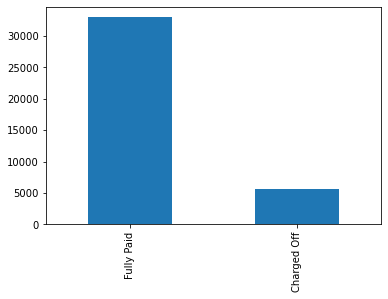

In [26]:
import  seaborn as sns
loan_df.loan_status.value_counts().plot.bar()

**Observation**  : 
We now have a cleaner and shorter data set with which we can do our analysis
We also defined our  **Target Variable**  ie **Loan Status**, against which we will do our Analysis
Let us create a temporary checkpoint to store our results

In [27]:
loan_df.to_csv("cleaned.csv", index=False)

## 4. Data Analysis ##

#### Purpose #### 


In [28]:
loan_analysis_df = pd.read_csv('cleaned.csv')

In [29]:
# Importing standard libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Reducing max row and columns to normal values
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 50)

In [30]:
#Utility Function 

#Plot dual bar
#This function takes a dataframe and either plots two categorical bars side by side or plots them in the same using hue
#If hue is provided then the plot is done in the same function
#If hue is not provided then the loan_status variable is used to split the same into two side by side bars and plotting is done
def plot_dualbar_or_huebar(df, categorize_by, hue=None, sortbyindex=False):
    if hue:
        plt.figure(figsize=[15,10])
        sns.barplot(data = loan_analysis_df, y=categorize_by, x="loan_status_cat", hue="loan_status" ,estimator=np.sum, orient="h")
        plt.show()
    else :
        print("In the else case")
        plt.figure(figsize=[15,10])
        #Plot for the universe

        plt.subplot(1, 2, 1)
        values = (loan_analysis_df[categorize_by].value_counts(normalize=True)*100)
        if sortbyindex:
            values = values.sort_index()
        ax = values.plot.bar()
        ax.set_ylabel('% in Loans Data', fontsize=16)
        ax.set_xlabel(categorize_by, fontsize=12)
        
        
        #Plot for the charged off loans
        plt.subplot(1, 2, 2)
        loan_analysis_co_df = (loan_analysis_df.loc[loan_analysis_df['loan_status']=='Charged Off'])
        values_co = (loan_analysis_co_df[categorize_by].value_counts(normalize=True)*100)
        if sortbyindex:
            values_co = values_co.sort_index()
        ax = values_co.plot.bar()
        ax.set_ylabel('% in Charged Off Loans Data', fontsize=16)
        ax.set_xlabel(categorize_by, fontsize=12)
        plt.show()
        
        
   
       

Lets determine the categorical and the numeric fields first to get a sense of the data

In [31]:
def plotLoanStatus(df, categorize_by, loan_status='Charged Off'):
    grp = dataframe.groupby(['loan_status',categorize_by])[categorize_by].count()
    cnt = dataframe.groupby(categorize_by)[categorize_by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [32]:
numeric_feats = loan_analysis_df.dtypes[loan_analysis_df.dtypes != "object"].index
categorical_feats = loan_analysis_df.dtypes[loan_analysis_df.dtypes == "object"].index

print("Numerical features: ", len(numeric_feats))
print("Categorical features: ", len(categorical_feats))

Numerical features:  26
Categorical features:  17


In [33]:
numeric_feats.sort_values()

Index(['annual_inc', 'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'inq_last_6mths',
       'installment', 'last_pymnt_amnt', 'loan_amnt', 'loan_status_cat',
       'mths_since_last_delinq', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pub_rec', 'pub_rec_bankruptcies', 'recoveries', 'revol_bal',
       'tax_liens', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'],
      dtype='object')

In [34]:
categorical_feats

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_d', 'loan_status', 'purpose', 'revol_util', 'sub_grade',
       'term', 'title', 'verification_status'],
      dtype='object')

### 4.1 Univariate Analysis ###

Lets look at the overall Features to see which variables could be helpful for deeper analysis

***Plotting all Numeric Features*** :

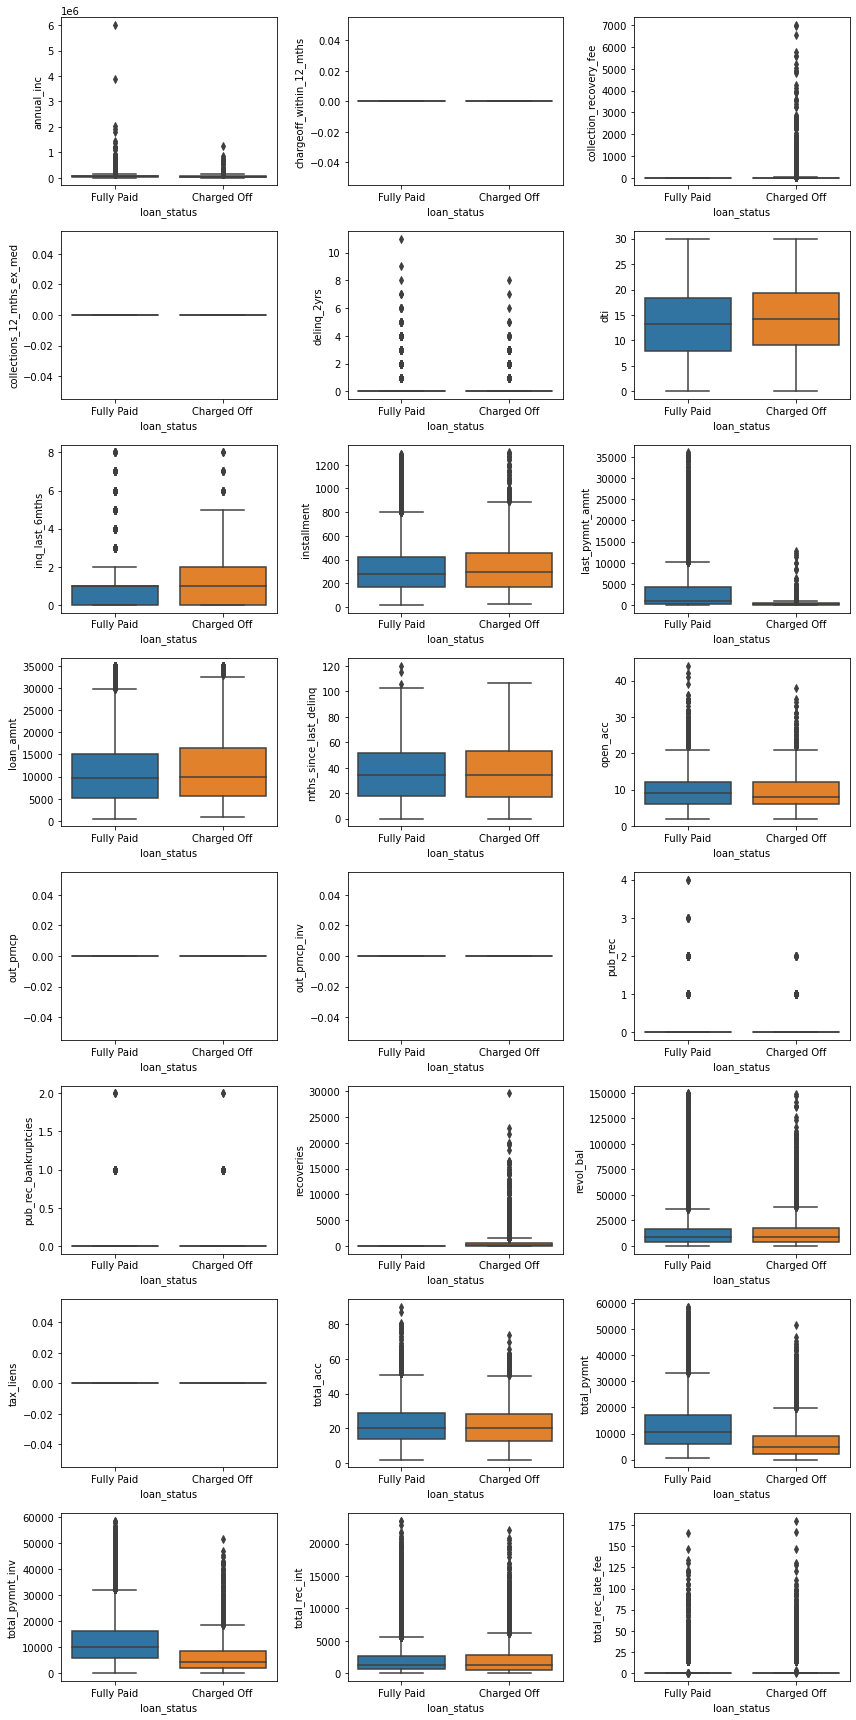

In [35]:
list_numerical_feats = list(numeric_feats)
nr_rows = 8
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(list_numerical_feats):
            sns.boxplot(y=list_numerical_feats[i], x='loan_status', data=loan_analysis_df, ax = axs[r][c])    
plt.tight_layout()    
plt.show()

Variable : **pub_rec_bankruptcies** 


Does previous public record of bankruptcies of an individual impact the ability to close a loan?

<AxesSubplot:>

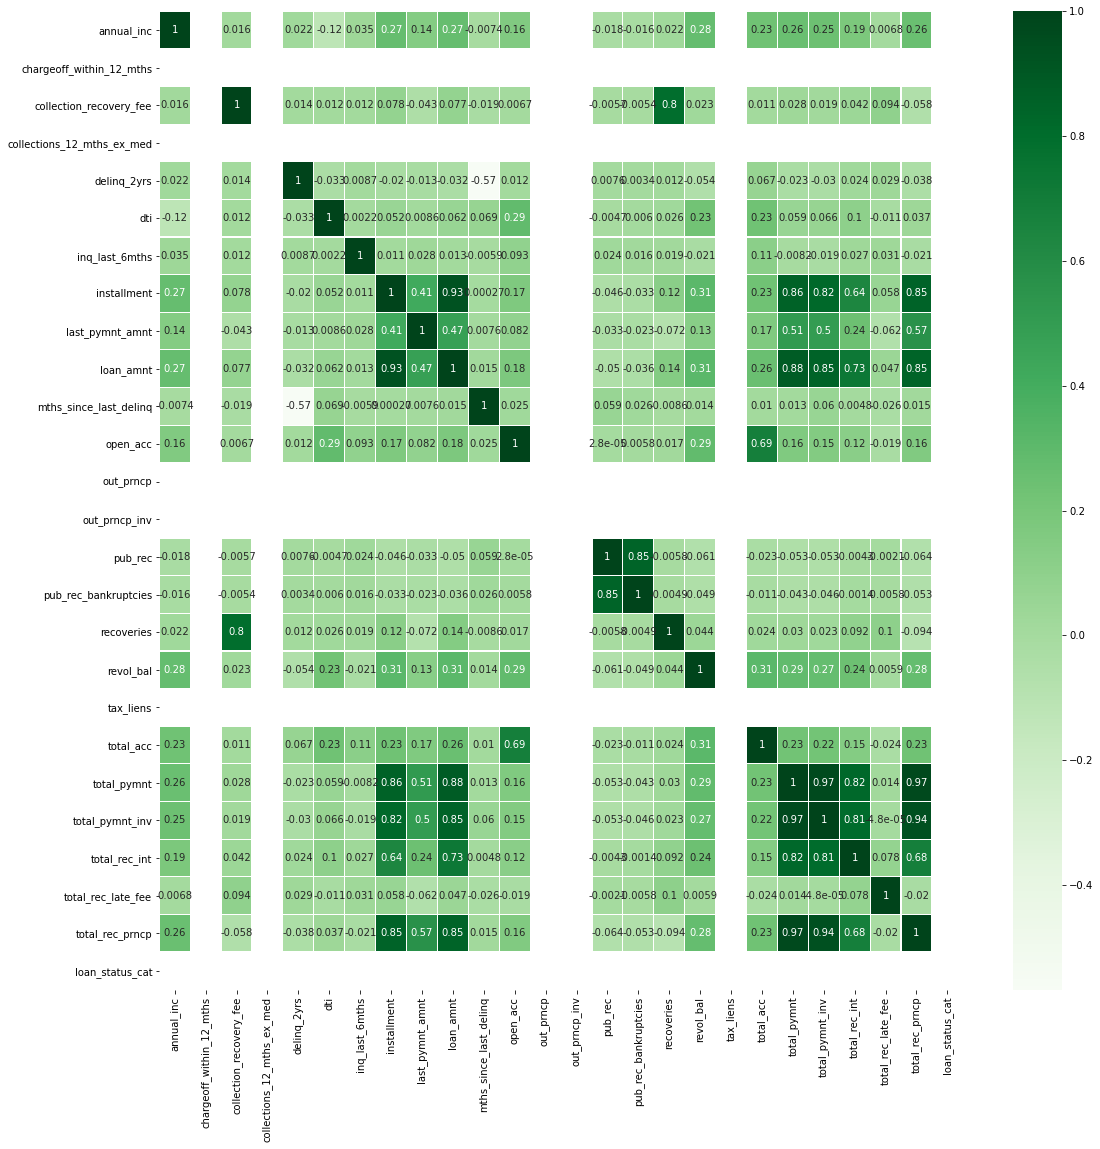

In [36]:
li=loan_analysis_df[numeric_feats]
corr=li.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(corr, cmap="Greens",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,linewidths=.1)

Inferences : 
    - **total_payment** and **total_payment_inv** and **loan_amt** are highly correlated
    - ** out_prncp** and **out_prncp_investor** show high correlation and one of them can be discarded
    - **pub_rec_bankruptcy** and **pub_rec** show 100% correlation.
    

In [37]:
loan_analysis_df.loc[:,["out_prncp","out_prncp_inv","pub_rec","pub_rec_bankruptcies"]].value_counts()

out_prncp  out_prncp_inv  pub_rec  pub_rec_bankruptcies
0.0        0.0            0        0.0                     35830
                          1        1.0                      1637
                                   0.0                       357
                          2        0.0                        42
                          3        0.0                         7
                          2        2.0                         5
                          4        0.0                         2
dtype: int64

**Finding**
- Out_Prncp - Outstanding Principal dosent have variations significant enough for analysis
- Out_Princpal_investors dont have lot of variations for analysis
- Outstanding Bankruptcies could possibly impact. Lets analyse this further

In the else case


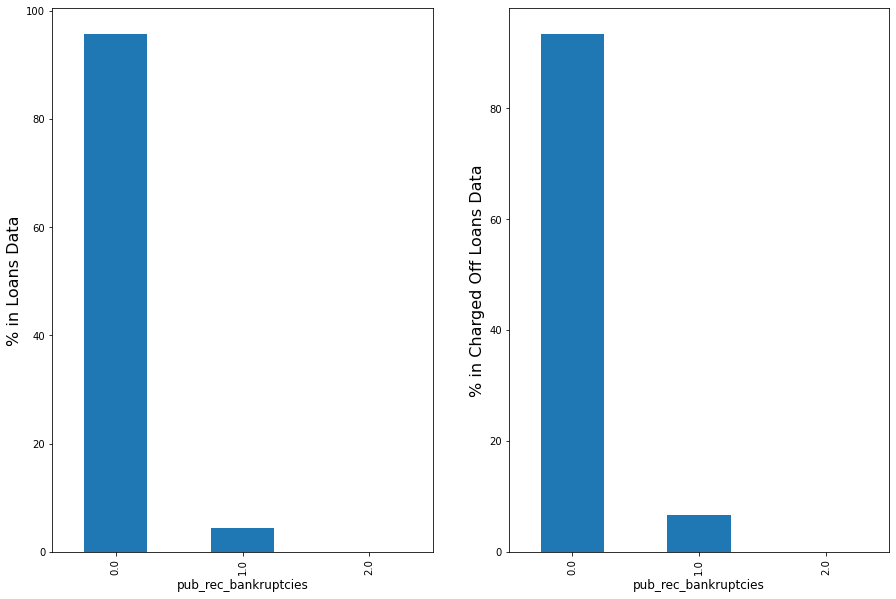

In [38]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'pub_rec_bankruptcies')

**INFERENCE**: NO Significant Correlation can be derived on previous bankruptcies

Variable : **Purpose**


Does the Purpose of the loan impact the ability to close a loan?


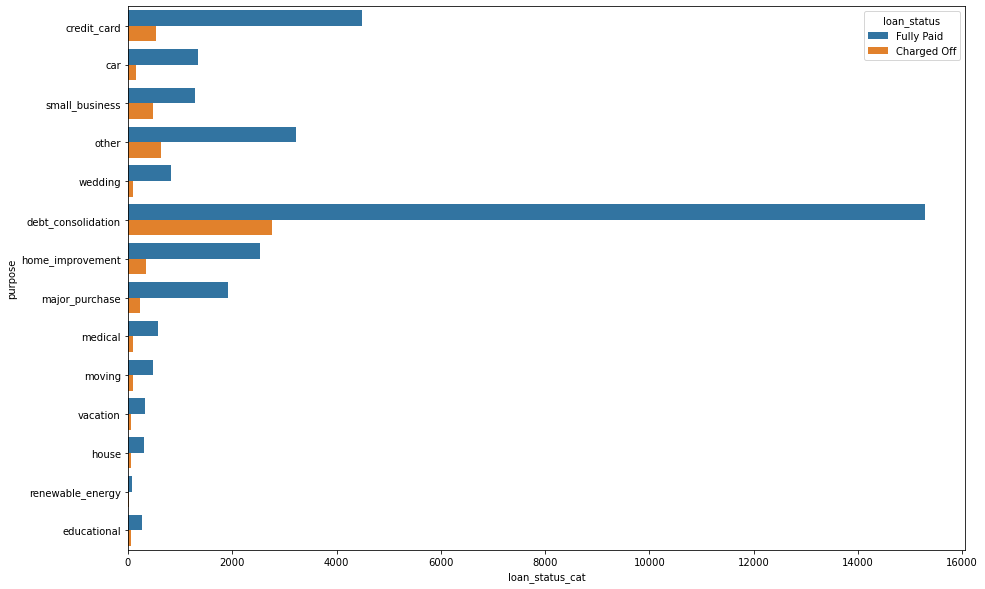

In [39]:
    plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'purpose', hue = 'loan_status')

In the else case


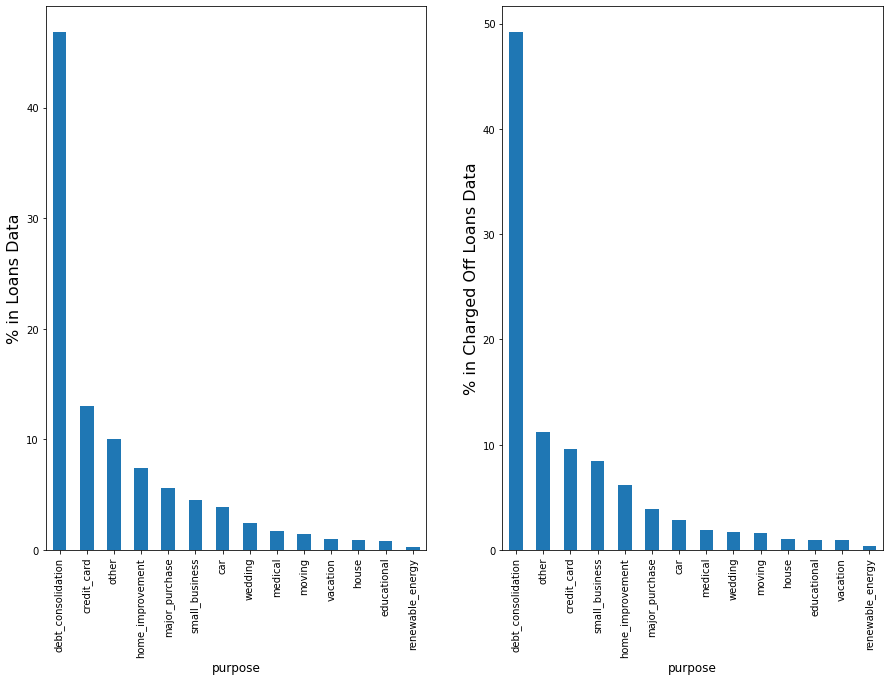

In [40]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'purpose')

**Observation** It looks like Debt Consolidation has the maximum number of defaulters, but numbers can be misleading. Lets look at this a relative of the total loans, and see if there is a significant variance in the numbers 

In [41]:
total_per_loan_status = loan_analysis_df.groupby(['loan_status','purpose'])['purpose'].count()
total =loan_analysis_df.groupby('purpose')['purpose'].count()
percentage_category_df = round(total_per_loan_status.unstack()* 100/total.T, 2)
percentage_category_df

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,10.67,10.78,15.33,17.23,12.07,16.08,10.33,15.57,15.97,16.38,18.63,27.08,14.13,10.37
Fully Paid,89.33,89.22,84.67,82.77,87.93,83.92,89.67,84.43,84.03,83.62,81.37,72.92,85.87,89.63


**Inference** 

As can be seen above, the relative percentages of Purpose as a percentage of Total Loans is well within the range of all loans. So this can be safely ignored

Variable : **Term** 

Does Term Impact the ability to pay off a loan? 

In the else case


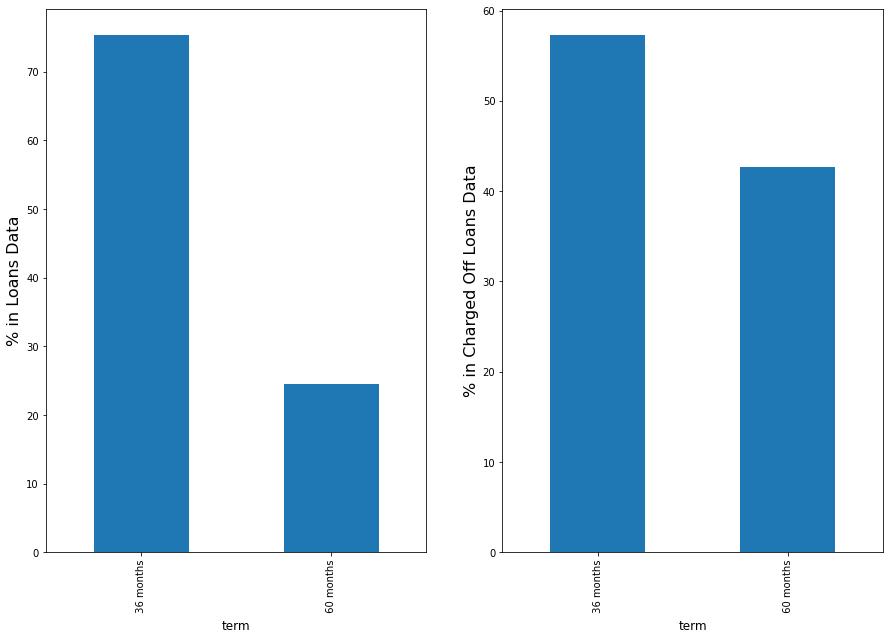

In [42]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'term')

**Inference** 

There is a definite correlation betwen higher term and charged off loans. Almost 40% of all charged off Loans have duration of 60 months. 

Variable : **Title**
    
Does the Title of the Loan Impact the Repayment?

In [43]:
loan_analysis_df.title.describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

In [44]:
loan_analysis_df.title.value_counts().head(10)

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
Credit Card Consolidation     348
Home Improvement              345
Debt consolidation            322
Small Business Loan           305
Personal                      301
Name: title, dtype: int64

In [45]:
loan_analysis_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

**Observation**
title column has 19297 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose.
This looks very similar to the purpose fields which can be used for the analysis. 

**Variable**  - Recoveries

Is Loan Club able to Recover Losses after it has been "Charged Off"?



In [46]:
loan_analysis_df.recoveries.value_counts(normalize=True).head(10)

0.00     0.890660
10.40    0.000104
11.29    0.000104
11.20    0.000078
12.09    0.000078
10.07    0.000078
13.00    0.000078
16.50    0.000078
19.20    0.000078
10.13    0.000078
Name: recoveries, dtype: float64

Text(0.5, 0, 'Percentage of Recovered LoanAmt on Charged Off Loans (%)')

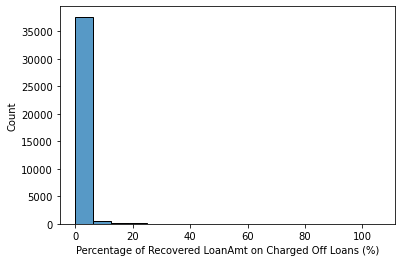

In [47]:
loan_analysis_df[loan_analysis_df.loan_status=="Charged Off"]
recovery_ratio  = round(loan_analysis_df.recoveries/loan_analysis_df.loan_amnt,2)*100

ax = sns.histplot(recovery_ratio)
ax.set_xlabel('Percentage of Recovered LoanAmt on Charged Off Loans (%)')

**Inference**


The Recovery Rate is below 5% for close to 100% of the Charged of Loans. 
This makes it very important for Lending club to ensure that there are minimum defaults

### 4.2 Bivariate Analysis ###

Variable **Grade** and **SubGrade**

Does the **Grade** or **SubGrade** of the loan impact the ability to Close the Loan. 


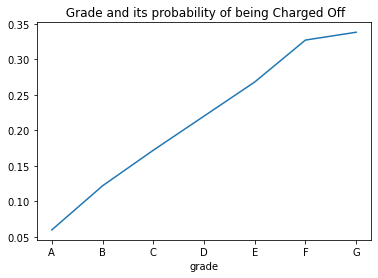

<Figure size 720x576 with 0 Axes>

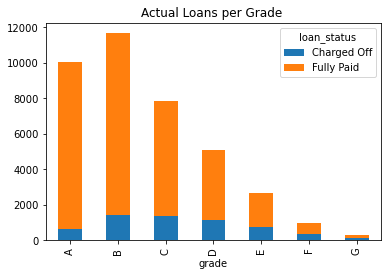

In [95]:
ct = pd.crosstab(loan_analysis_df['grade'], loan_analysis_df['loan_status'],margins=True)
ct['prob_by_grad'] = round(ct['Charged Off']/ct['All'],3)
## Remove All 
ct = ct[0:-1]
#plt.figure(figsize=[8,6])
        

#plt.subplot(1, 2, 1)
line_plot = ct['prob_by_grad'].plot()
ax = line_plot.plot( marker='o',color = 'b')
plt.title(" Grade and its probability of being Charged Off")

#plt.subplot(1, 2, 2)
plt.figure(figsize=[10,8])
ax1= agg_grade_loans = loan_analysis_df.groupby(['loan_status','grade'])['grade'].agg(['count']).rename(columns={'count':'Frequency'})
agg_grade_loans.Frequency.unstack().T.plot.bar(stacked=True)
plt.title("Actual Loans per Grade ")
plt.show()


<Figure size 720x432 with 0 Axes>

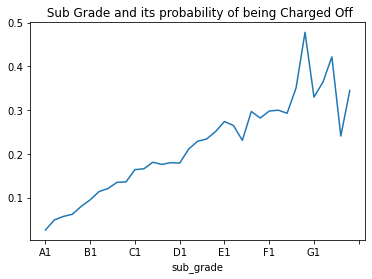

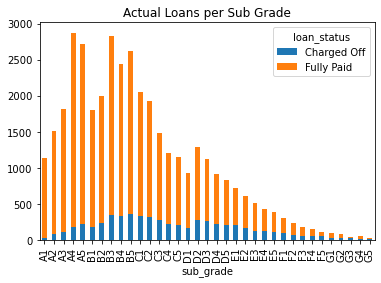

<Figure size 720x432 with 0 Axes>

In [94]:
ct = pd.crosstab(loan_analysis_df['sub_grade'], loan_analysis_df['loan_status'],margins=True)
ct['prob_by_sub_grad'] = round(ct['Charged Off']/ct['All'],3)

ct = ct[0:-1]
line_plot = ct['prob_by_sub_grad'].plot()
ax1 = line_plot.plot(figsize=(20,10), marker='o',color = 'b')
plt.title(" Sub Grade and its probability of being Charged Off")



agg_grade_loans1 = loan_analysis_df.groupby(['loan_status','sub_grade'])['sub_grade'].agg(['count']).rename(columns={'count':'Frequency'})
agg_grade_loans1.Frequency.unstack().T.plot.bar(stacked=True)
plt.title("Actual Loans per Sub Grade")
plt.figure(figsize=[10,6])

**Inference** 

As the Grade increases, the probability of charge off is also increased.

## 5. Summary Recommendation/Plots ##